In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def read_data_09(file_name):
    with open(file_name) as my_file:
        input = my_file.read()
    input_strings = input.split("\n")
    input_strings = [[int(item) for item in line.split(",")] for line in input_strings]
    tiles_np = np.array(input_strings)

    return tiles_np

In [4]:
def calculate_areas(tiles_np):
    tile_names = [",".join(tile.astype(str)) for tile in tiles_np]
    columns =  ["tile_1_str", "tile_1", "tile_1_id", "tile_2_str", "tile_2", "tile_2_id", "area"]
    areas_df = pd.DataFrame(columns = columns)

    for tile_id, tile in tqdm(enumerate(tiles_np)):
        tile_1 = ",".join(tile.astype(str))
        # print(tile)
        areas = (np.abs(tiles_np - tile) + 1).prod(axis=1)
        temp_dict = {key:value for key, value in zip(columns,
                      [tile_1,
                        [tuple(x for x in tile)]*len(tile_names),
                        tile_id,
                        tile_names,
                        [tuple(x for x in tiles) for tiles in tiles_np],
                        list(range(len(tiles_np))),
                        areas])}
        temp_df = pd.DataFrame(temp_dict)
        areas_df = pd.concat([areas_df, temp_df])

        areas_df = areas_df[areas_df["area"] > .0] # get rid of self areas
        areas_df = areas_df.sort_values("area", ascending=False) # sort by areas
        areas_df = areas_df.iloc[::2, :] # get rid of repeat rows
        areas_df = areas_df.reset_index(drop=True) # reset index for readability

    return areas_df


In [5]:
tiles_test = read_data_09("../data/input09_test.txt")
tiles_test2 = read_data_09("../data/input09_test2.txt")
tiles_puzzle = read_data_09("../data/input09_puzzle.txt")


## Test

In [22]:
tiles_np = tiles_test
tiles_np

array([[ 7,  1],
       [11,  1],
       [11,  7],
       [ 9,  7],
       [ 9,  5],
       [ 2,  5],
       [ 2,  3],
       [ 7,  3]])

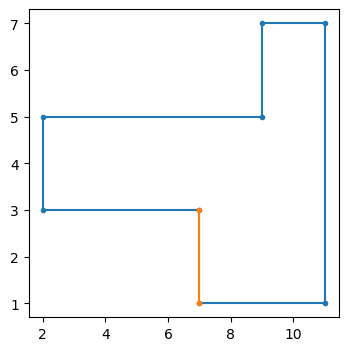

In [23]:
plt.rcParams["figure.figsize"] = (4,4)
plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')
# plt.show()

In [24]:
areas_df = calculate_areas(tiles_np)
areas_df.head()

8it [00:00, 503.50it/s]


,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area
0,"11,1","(11, 1)",1,"2,5","(2, 5)",5,50
1,"2,3","(2, 3)",6,"11,1","(11, 1)",1,30
2,"2,3","(2, 3)",6,"9,5","(9, 5)",4,24
3,"7,3","(7, 3)",7,"2,5","(2, 5)",5,18
4,"7,3","(7, 3)",7,"9,7","(9, 7)",3,15


In [ ]:
areas_df["start_tile_inside"] = False
areas_df["tile_inside"] = None

areas_df["edge_inside_rectangle"] = False
areas_df["x_inside"] = None
areas_df["y_inside"] = None
areas_df["edge_inside"] = None
for row in areas_df.itertuples():
    edge_inside_rectangle = False
    for edge_start_id, edge_start in enumerate(tiles_np):
        edge_finish = tiles_np[(edge_start_id + 1) % tiles_np.shape[0]]
        edge_start_tuple = tuple(x for x in edge_start)
        edge_finish_tuple = tuple(x for x in edge_finish)

        start_not_corner = edge_start_tuple not in [row.tile_1, row.tile_2]
        finish_not_corner = edge_finish_tuple not in [row.tile_1, row.tile_2]

        if start_not_corner and finish_not_corner:
            edge_start_x_m_than_min = edge_start[0] > min(row.tile_1[0], row.tile_2[0])
            edge_start_x_l_than_max = edge_start[0] < max(row.tile_1[0], row.tile_2[0])
            edge_start_y_m_than_min = edge_start[1] > min(row.tile_1[1], row.tile_2[1])
            edge_start_y_l_than_max = edge_start[1] < max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_m_than_min = edge_finish[0] > min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_l_than_max = edge_finish[0] < max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_m_than_min = edge_finish[1] > min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_l_than_max = edge_finish[1] < max(row.tile_1[1], row.tile_2[1])
            edge_start_x_e_min = edge_start[0] == min(row.tile_1[0], row.tile_2[0])
            edge_start_x_e_max = edge_start[0] == max(row.tile_1[0], row.tile_2[0])
            edge_start_y_e_min = edge_start[1] == min(row.tile_1[1], row.tile_2[1])
            edge_start_y_e_max = edge_start[1] == max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_e_min = edge_finish[0] == min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_e_max = edge_finish[0] == max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_e_min = edge_finish[1] == min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_e_max = edge_finish[1] == max(row.tile_1[1], row.tile_2[1])

            start_tile_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_start_y_m_than_min, edge_start_y_l_than_max])

            edge_on_vertical_border = all([edge_start_y_e_min, edge_finish_y_e_min]) or all([edge_start_y_e_max, edge_finish_y_e_max])
            edge_on_horizontal_border = all([edge_start_x_e_min, edge_finish_x_e_min]) or all([edge_start_x_e_max, edge_finish_x_e_max])

            x_exactly_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_finish_x_m_than_min, edge_finish_x_l_than_max])
            x_start_equals = any([edge_start_x_e_min, edge_start_x_e_max])
            x_finish_equals = any([edge_finish_x_e_min, edge_finish_x_e_max])
            y_exactly_inside = all([edge_start_y_m_than_min, edge_start_y_l_than_max, edge_finish_y_m_than_min, edge_finish_y_l_than_max])
            y_start_equals = any([edge_start_y_e_min, edge_start_y_e_max])
            y_finish_equals = any([edge_finish_y_e_min, edge_finish_y_e_max])
            
            x_inside = (x_exactly_inside and (y_start_equals and y_finish_equals and not edge_on_vertical_border))
            y_inside = (y_exactly_inside and (x_start_equals and x_finish_equals and not edge_on_horizontal_border))

            if start_tile_inside or x_inside or y_inside:
                edge_inside_rectangle = True
                break
    if start_tile_inside:
        areas_df.at[row.Index, "start_tile_inside"] = start_tile_inside
        areas_df.at[row.Index, "tile_inside"] = edge_start_tuple
    if edge_inside_rectangle:
        areas_df.at[row.Index, "edge_inside_rectangle"] = edge_inside_rectangle
        areas_df.at[row.Index, "x_inside"] = x_inside
        areas_df.at[row.Index, "y_inside"] = y_inside
        areas_df.at[row.Index, "edge_inside"] = (edge_start_tuple, edge_finish_tuple)

In [26]:
filtered_df = areas_df[areas_df["edge_inside_rectangle"] == False]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.head()

,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area,start_tile_inside,tile_inside,edge_inside_rectangle,x_inside,y_inside,edge_inside
0,"2,3","(2, 3)",6,"9,5","(9, 5)",4,24,False,None,False,None,None,None
1,"7,3","(7, 3)",7,"2,5","(2, 5)",5,18,False,None,False,None,None,None
2,"7,3","(7, 3)",7,"9,7","(9, 7)",3,15,False,None,False,None,None,None
3,"9,5","(9, 5)",4,"2,5","(2, 5)",5,8,False,None,False,None,None,None
4,"9,7","(9, 7)",3,"11,7","(11, 7)",2,3,False,None,False,None,None,None


In [27]:
tile_1, tile_2 = filtered_df.loc[0,["tile_1", "tile_2"]]
x_coordinates = [tile_1[0], tile_1[0], tile_2[0], tile_2[0], tile_1[0]]
y_coordinates = [tile_1[1], tile_2[1], tile_2[1], tile_1[1], tile_1[1]]

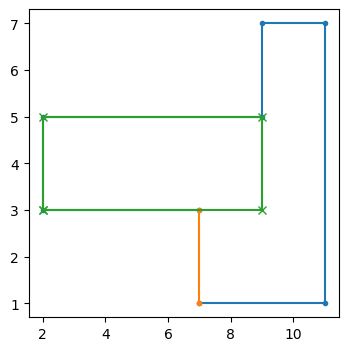

In [28]:
plt.rcParams["figure.figsize"] = (4,4)

plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')
plt.plot(x_coordinates, y_coordinates, marker = 'x')

plt.show()

In [29]:
filtered_df.loc[0]

tile_1_str                  2,3
tile_1                   (2, 3)
tile_1_id                     6
tile_2_str                  9,5
tile_2                   (9, 5)
tile_2_id                     4
area                         24
start_tile_inside         False
tile_inside                None
edge_inside_rectangle     False
x_inside                   None
y_inside                   None
edge_inside                None
Name: 0, dtype: object

## Test 2

In [14]:
tiles_np = tiles_test2
tiles_np

array([[0, 0],
       [2, 0],
       [2, 2],
       [4, 2],
       [4, 0],
       [6, 0],
       [6, 4],
       [4, 4],
       [4, 6],
       [6, 6],
       [6, 8],
       [0, 8]])

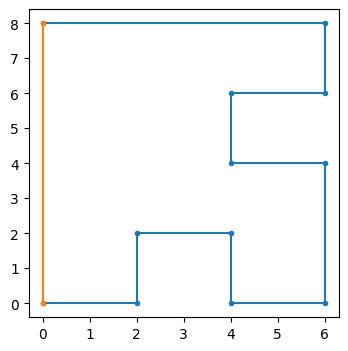

In [15]:
plt.rcParams["figure.figsize"] = (4,4)
plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')
# plt.show()

In [16]:
areas_df = calculate_areas(tiles_np)
areas_df.head()

12it [00:00, 497.44it/s]


,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area
0,"0,0","(0, 0)",0,"6,8","(6, 8)",10,63
1,"0,8","(0, 8)",11,"4,0","(4, 0)",4,45
2,"0,8","(0, 8)",11,"4,2","(4, 2)",3,35
3,"0,8","(0, 8)",11,"6,4","(6, 4)",6,35
4,"6,6","(6, 6)",9,"2,2","(2, 2)",2,25


In [ ]:
areas_df["start_tile_inside"] = False
areas_df["tile_inside"] = None

areas_df["edge_inside_rectangle"] = False
areas_df["x_inside"] = None
areas_df["y_inside"] = None
areas_df["edge_inside"] = None
for row in areas_df.itertuples():
    edge_inside_rectangle = False
    for edge_start_id, edge_start in enumerate(tiles_np):
        edge_finish = tiles_np[(edge_start_id + 1) % tiles_np.shape[0]]
        edge_start_tuple = tuple(x for x in edge_start)
        edge_finish_tuple = tuple(x for x in edge_finish)

        start_not_corner = edge_start_tuple not in [row.tile_1, row.tile_2]
        finish_not_corner = edge_finish_tuple not in [row.tile_1, row.tile_2]

        if start_not_corner and finish_not_corner:
            edge_start_x_m_than_min = edge_start[0] > min(row.tile_1[0], row.tile_2[0])
            edge_start_x_l_than_max = edge_start[0] < max(row.tile_1[0], row.tile_2[0])
            edge_start_y_m_than_min = edge_start[1] > min(row.tile_1[1], row.tile_2[1])
            edge_start_y_l_than_max = edge_start[1] < max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_m_than_min = edge_finish[0] > min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_l_than_max = edge_finish[0] < max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_m_than_min = edge_finish[1] > min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_l_than_max = edge_finish[1] < max(row.tile_1[1], row.tile_2[1])
            edge_start_x_e_min = edge_start[0] == min(row.tile_1[0], row.tile_2[0])
            edge_start_x_e_max = edge_start[0] == max(row.tile_1[0], row.tile_2[0])
            edge_start_y_e_min = edge_start[1] == min(row.tile_1[1], row.tile_2[1])
            edge_start_y_e_max = edge_start[1] == max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_e_min = edge_finish[0] == min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_e_max = edge_finish[0] == max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_e_min = edge_finish[1] == min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_e_max = edge_finish[1] == max(row.tile_1[1], row.tile_2[1])

            start_tile_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_start_y_m_than_min, edge_start_y_l_than_max])

            edge_on_vertical_border = all([edge_start_y_e_min, edge_finish_y_e_min]) or all([edge_start_y_e_max, edge_finish_y_e_max])
            edge_on_horizontal_border = all([edge_start_x_e_min, edge_finish_x_e_min]) or all([edge_start_x_e_max, edge_finish_x_e_max])

            x_exactly_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_finish_x_m_than_min, edge_finish_x_l_than_max])
            x_start_equals = any([edge_start_x_e_min, edge_start_x_e_max])
            x_finish_equals = any([edge_finish_x_e_min, edge_finish_x_e_max])
            y_exactly_inside = all([edge_start_y_m_than_min, edge_start_y_l_than_max, edge_finish_y_m_than_min, edge_finish_y_l_than_max])
            y_start_equals = any([edge_start_y_e_min, edge_start_y_e_max])
            y_finish_equals = any([edge_finish_y_e_min, edge_finish_y_e_max])
            
            x_inside = (x_exactly_inside and (y_start_equals and y_finish_equals and not edge_on_vertical_border))
            y_inside = (y_exactly_inside and (x_start_equals and x_finish_equals and not edge_on_horizontal_border))

            if start_tile_inside or x_inside or y_inside:
                edge_inside_rectangle = True
                break
    if start_tile_inside:
        areas_df.at[row.Index, "start_tile_inside"] = start_tile_inside
        areas_df.at[row.Index, "tile_inside"] = edge_start_tuple
    if edge_inside_rectangle:
        areas_df.at[row.Index, "edge_inside_rectangle"] = edge_inside_rectangle
        areas_df.at[row.Index, "x_inside"] = x_inside
        areas_df.at[row.Index, "y_inside"] = y_inside
        areas_df.at[row.Index, "edge_inside"] = (edge_start_tuple, edge_finish_tuple)

In [18]:
filtered_df = areas_df[areas_df["edge_inside_rectangle"] == False]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.head()

,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area,start_tile_inside,tile_inside,edge_inside_rectangle,x_inside,y_inside,edge_inside
0,"0,8","(0, 8)",11,"4,2","(4, 2)",3,35,False,None,False,None,None,None
1,"0,8","(0, 8)",11,"2,2","(2, 2)",2,21,False,None,False,None,None,None
2,"0,8","(0, 8)",11,"4,6","(4, 6)",8,15,False,None,False,None,None,None
3,"4,6","(4, 6)",8,"6,8","(6, 8)",10,9,False,None,False,None,None,None
4,"6,8","(6, 8)",10,"0,8","(0, 8)",11,7,False,None,False,None,None,None


In [19]:
tile_1, tile_2 = filtered_df.loc[0,["tile_1", "tile_2"]]
x_coordinates = [tile_1[0], tile_1[0], tile_2[0], tile_2[0], tile_1[0]]
y_coordinates = [tile_1[1], tile_2[1], tile_2[1], tile_1[1], tile_1[1]]

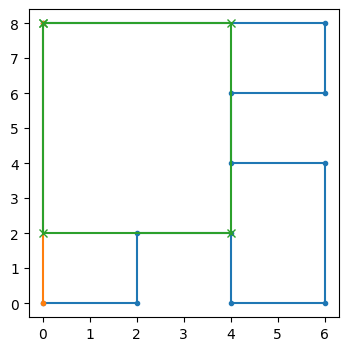

In [20]:
plt.rcParams["figure.figsize"] = (4,4)

plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')
plt.plot(x_coordinates, y_coordinates, marker = 'x')

plt.show()

In [21]:
filtered_df.loc[0]

tile_1_str                  0,8
tile_1                   (0, 8)
tile_1_id                    11
tile_2_str                  4,2
tile_2                   (4, 2)
tile_2_id                     3
area                         35
start_tile_inside         False
tile_inside                None
edge_inside_rectangle     False
x_inside                   None
y_inside                   None
edge_inside                None
Name: 0, dtype: object

## Plot

In [30]:
tiles_np = tiles_puzzle

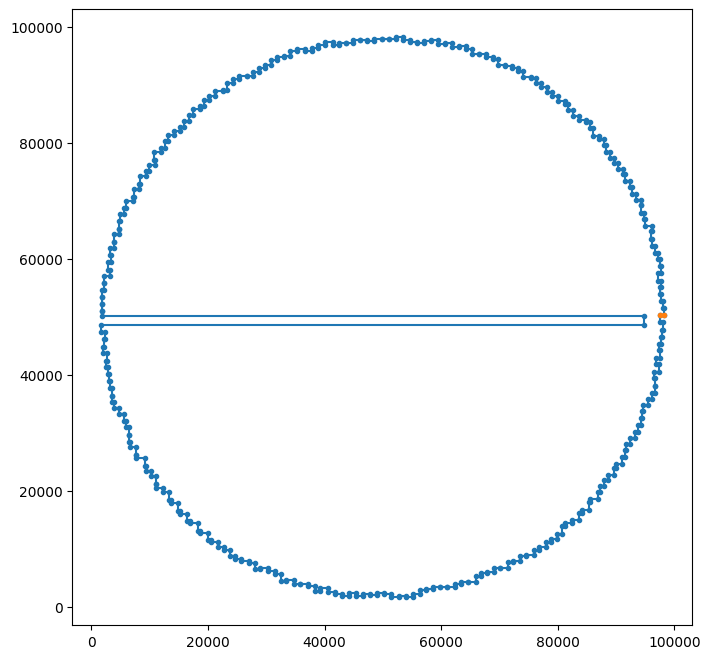

In [31]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')
# plt.show()

In [32]:
tiles_np.shape[0]/2

248.0

## Top half

In [33]:
tiles_np = tiles_puzzle[0:249]
# tiles_np = tiles_puzzle[-4:248:-1]

In [34]:
areas_df = calculate_areas(tiles_np)
areas_df.head()

249it [00:00, 489.93it/s]


,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area
0,"73212,92894","(73212, 92894)",85,"1890,50228","(1890, 50228)",247,3043138441
1,"1890,50228","(1890, 50228)",247,"72128,93270","(72128, 93270)",87,3023297277
2,"1890,50228","(1890, 50228)",247,"73212,92327","(73212, 92327)",84,3002698300
3,"1810,50973","(1810, 50973)",245,"76233,91130","(76233, 91130)",79,2988718992
4,"1890,50228","(1890, 50228)",247,"76233,90250","(76233, 90250)",78,2975469912


In [ ]:
areas_df["start_tile_inside"] = False
areas_df["tile_inside"] = None

areas_df["edge_inside_rectangle"] = False
areas_df["x_inside"] = None
areas_df["y_inside"] = None
areas_df["edge_inside"] = None
for row in areas_df.itertuples():
    edge_inside_rectangle = False
    for edge_start_id, edge_start in enumerate(tiles_np):
        edge_finish = tiles_np[(edge_start_id + 1) % tiles_np.shape[0]]
        edge_start_tuple = tuple(x for x in edge_start)
        edge_finish_tuple = tuple(x for x in edge_finish)

        start_not_corner = edge_start_tuple not in [row.tile_1, row.tile_2]
        finish_not_corner = edge_finish_tuple not in [row.tile_1, row.tile_2]

        if start_not_corner and finish_not_corner:
            edge_start_x_m_than_min = edge_start[0] > min(row.tile_1[0], row.tile_2[0])
            edge_start_x_l_than_max = edge_start[0] < max(row.tile_1[0], row.tile_2[0])
            edge_start_y_m_than_min = edge_start[1] > min(row.tile_1[1], row.tile_2[1])
            edge_start_y_l_than_max = edge_start[1] < max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_m_than_min = edge_finish[0] > min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_l_than_max = edge_finish[0] < max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_m_than_min = edge_finish[1] > min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_l_than_max = edge_finish[1] < max(row.tile_1[1], row.tile_2[1])
            edge_start_x_e_min = edge_start[0] == min(row.tile_1[0], row.tile_2[0])
            edge_start_x_e_max = edge_start[0] == max(row.tile_1[0], row.tile_2[0])
            edge_start_y_e_min = edge_start[1] == min(row.tile_1[1], row.tile_2[1])
            edge_start_y_e_max = edge_start[1] == max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_e_min = edge_finish[0] == min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_e_max = edge_finish[0] == max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_e_min = edge_finish[1] == min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_e_max = edge_finish[1] == max(row.tile_1[1], row.tile_2[1])

            start_tile_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_start_y_m_than_min, edge_start_y_l_than_max])

            edge_on_vertical_border = all([edge_start_y_e_min, edge_finish_y_e_min]) or all([edge_start_y_e_max, edge_finish_y_e_max])
            edge_on_horizontal_border = all([edge_start_x_e_min, edge_finish_x_e_min]) or all([edge_start_x_e_max, edge_finish_x_e_max])

            x_exactly_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_finish_x_m_than_min, edge_finish_x_l_than_max])
            x_start_equals = any([edge_start_x_e_min, edge_start_x_e_max])
            x_finish_equals = any([edge_finish_x_e_min, edge_finish_x_e_max])
            y_exactly_inside = all([edge_start_y_m_than_min, edge_start_y_l_than_max, edge_finish_y_m_than_min, edge_finish_y_l_than_max])
            y_start_equals = any([edge_start_y_e_min, edge_start_y_e_max])
            y_finish_equals = any([edge_finish_y_e_min, edge_finish_y_e_max])
            
            x_inside = (x_exactly_inside and (y_start_equals and y_finish_equals and not edge_on_vertical_border))
            y_inside = (y_exactly_inside and (x_start_equals and x_finish_equals and not edge_on_horizontal_border))

            if start_tile_inside or x_inside or y_inside:
                edge_inside_rectangle = True
                break
    if start_tile_inside:
        areas_df.at[row.Index, "start_tile_inside"] = start_tile_inside
        areas_df.at[row.Index, "tile_inside"] = edge_start_tuple
    if edge_inside_rectangle:
        areas_df.at[row.Index, "edge_inside_rectangle"] = edge_inside_rectangle
        areas_df.at[row.Index, "x_inside"] = x_inside
        areas_df.at[row.Index, "y_inside"] = y_inside
        areas_df.at[row.Index, "edge_inside"] = (edge_start_tuple, edge_finish_tuple)

In [36]:
filtered_df = areas_df[areas_df["edge_inside_rectangle"] == False]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.head()

,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area,start_tile_inside,tile_inside,edge_inside_rectangle,x_inside,y_inside,edge_inside
0,"94822,50228","(94822, 50228)",248,"3915,62932","(3915, 62932)",226,1154986140,False,None,False,None,None,None
1,"94822,50228","(94822, 50228)",248,"3915,61848","(3915, 61848)",227,1056441868,False,None,False,None,None,None
2,"94822,50228","(94822, 50228)",248,"3366,60571","(3366, 60571)",230,946031208,False,None,False,None,None,None
3,"94822,50228","(94822, 50228)",248,"3122,58155","(3122, 58155)",234,727005528,False,None,False,None,None,None
4,"94822,50228","(94822, 50228)",248,"3122,57084","(3122, 57084)",235,628793757,False,None,False,None,None,None


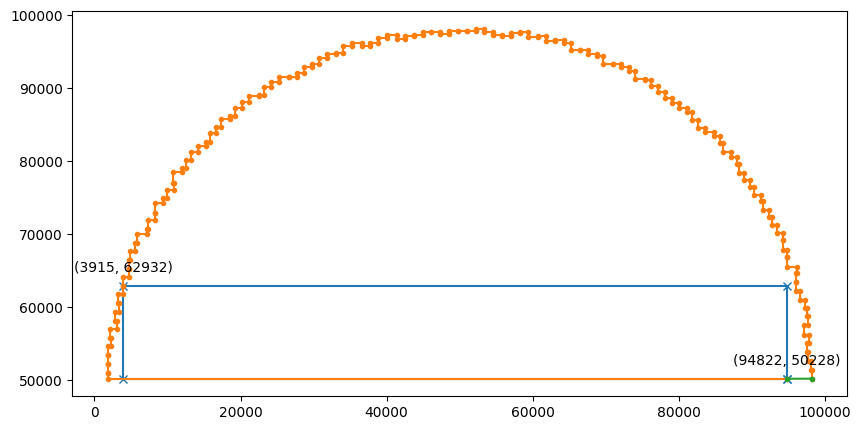

In [37]:
tile_1, tile_2 = filtered_df.loc[0,["tile_1", "tile_2"]]
x_coordinates = [tile_1[0], tile_1[0], tile_2[0], tile_2[0], tile_1[0]]
y_coordinates = [tile_1[1], tile_2[1], tile_2[1], tile_1[1], tile_1[1]]

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_coordinates, y_coordinates, marker = 'x')

plt.annotate(str((int(tile_1[0]), int(tile_1[1]))), tile_1, textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(str((int(tile_2[0]), int(tile_2[1]))), tile_2, textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
# for i, tile in enumerate(tiles_np):
#     s = str((int(tile[0]), int(tile[1])))
#     plt.annotate(s, (tiles_np[i, 0], tiles_np[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')
plt.show()

In [38]:
filtered_df.loc[0]

tile_1_str                  94822,50228
tile_1                   (94822, 50228)
tile_1_id                           248
tile_2_str                   3915,62932
tile_2                    (3915, 62932)
tile_2_id                           226
area                         1154986140
start_tile_inside                 False
tile_inside                        None
edge_inside_rectangle             False
x_inside                           None
y_inside                           None
edge_inside                        None
Name: 0, dtype: object

### Debug

In [39]:
areas_df[areas_df["tile_2_id"] > 210][areas_df["tile_2_id"] < 232][areas_df["tile_1_id"] == 248]

/tmp/ipykernel_465/4040003228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  areas_df[areas_df["tile_2_id"] > 210][areas_df["tile_2_id"] < 232][areas_df["tile_1_id"] == 248]
/tmp/ipykernel_465/4040003228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  areas_df[areas_df["tile_2_id"] > 210][areas_df["tile_2_id"] < 232][areas_df["tile_1_id"] == 248]


,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area,start_tile_inside,tile_inside,edge_inside_rectangle,x_inside,y_inside,edge_inside
102,"94822,50228","(94822, 50228)",248,"7378,70721","(7378, 70721)",211,1792097830,True,"(94784, 66846)",True,False,False,"((94784, 66846), (94784, 67925))"
114,"94822,50228","(94822, 50228)",248,"4871,67760","(4871, 67760)",218,1577128416,True,"(94784, 66846)",True,False,False,"((94784, 66846), (94784, 67925))"
115,"94822,50228","(94822, 50228)",248,"5582,67760","(5582, 67760)",217,1564662453,True,"(94784, 66846)",True,False,False,"((94784, 66846), (94784, 67925))"
126,"94822,50228","(94822, 50228)",248,"4679,65214","(4679, 65214)",221,1350988128,True,"(4737, 64207)",True,False,False,"((4737, 64207), (3895, 64207))"
130,"94822,50228","(94822, 50228)",248,"3895,64207","(3895, 64207)",224,1271173440,True,"(3915, 62932)",True,False,False,"((3915, 62932), (3915, 61848))"
136,"94822,50228","(94822, 50228)",248,"3915,62932","(3915, 62932)",226,1154986140,False,None,False,None,None,None
140,"94822,50228","(94822, 50228)",248,"3259,61848","(3259, 61848)",228,1064065244,True,"(3366, 60571)",True,False,False,"((3366, 60571), (3366, 59436))"
141,"94822,50228","(94822, 50228)",248,"3915,61848","(3915, 61848)",227,1056441868,False,None,False,None,None,None
147,"94822,50228","(94822, 50228)",248,"3366,60571","(3366, 60571)",230,946031208,False,None,False,None,None,None


/tmp/ipykernel_465/473044775.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(tile_inside[0][0], tile_inside[0][1], marker = 'o')
/tmp/ipykernel_465/473044775.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str((int(tile_inside[0][0]), int(tile_inside[0][1]))), tile_inside[0], textcoords="offset points", xytext=(0,-10), ha='center', color='red')


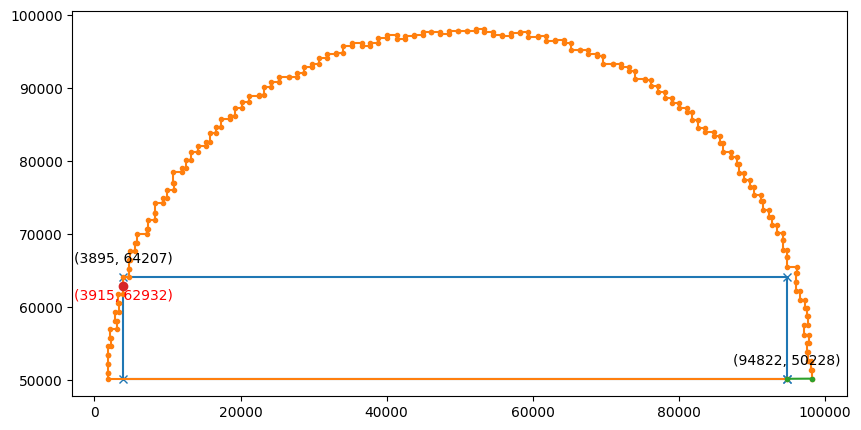

In [40]:
row_id = 130
tile_1, tile_2 = areas_df.loc[row_id,["tile_1", "tile_2"]]
x_coordinates = [tile_1[0], tile_1[0], tile_2[0], tile_2[0], tile_1[0]]
y_coordinates = [tile_1[1], tile_2[1], tile_2[1], tile_1[1], tile_1[1]]

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_coordinates, y_coordinates, marker = 'x')

plt.annotate(str((int(tile_1[0]), int(tile_1[1]))), tile_1, textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(str((int(tile_2[0]), int(tile_2[1]))), tile_2, textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
# for i, tile in enumerate(tiles_np):
#     s = str((int(tile[0]), int(tile[1])))
#     plt.annotate(s, (tiles_np[i, 0], tiles_np[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')

tile_inside = areas_df.loc[row_id,["tile_inside"]]
if tile_inside is not None:
    plt.plot(tile_inside[0][0], tile_inside[0][1], marker = 'o')
    plt.annotate(str((int(tile_inside[0][0]), int(tile_inside[0][1]))), tile_inside[0], textcoords="offset points", xytext=(0,-10), ha='center', color='red')

plt.show()

## Bottom half

In [41]:
# tiles_np = tiles_puzzle[0:249]
tiles_np = tiles_puzzle[-1:248:-1]

In [42]:
areas_df = calculate_areas(tiles_np)
areas_df.head()

247it [00:00, 497.36it/s]


,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area
0,"97534,50245","(97534, 50245)",0,"24596,8258","(24596, 8258)",166,3062562732
1,"1557,48525","(1557, 48525)",245,"77896,10352","(77896, 10352)",75,2914203160
2,"1557,48525","(1557, 48525)",245,"72326,7784","(72326, 7784)",85,2883311340
3,"1557,48525","(1557, 48525)",245,"75860,9930","(75860, 9930)",78,2867837184
4,"1557,48525","(1557, 48525)",245,"70119,6792","(70119, 6792)",89,2861408242


In [ ]:
areas_df["start_tile_inside"] = False
areas_df["tile_inside"] = None

areas_df["edge_inside_rectangle"] = False
areas_df["x_inside"] = None
areas_df["y_inside"] = None
areas_df["edge_inside"] = None
for row in areas_df.itertuples():
    edge_inside_rectangle = False
    for edge_start_id, edge_start in enumerate(tiles_np):
        edge_finish = tiles_np[(edge_start_id + 1) % tiles_np.shape[0]]
        edge_start_tuple = tuple(x for x in edge_start)
        edge_finish_tuple = tuple(x for x in edge_finish)

        start_not_corner = edge_start_tuple not in [row.tile_1, row.tile_2]
        finish_not_corner = edge_finish_tuple not in [row.tile_1, row.tile_2]

        if start_not_corner and finish_not_corner:
            edge_start_x_m_than_min = edge_start[0] > min(row.tile_1[0], row.tile_2[0])
            edge_start_x_l_than_max = edge_start[0] < max(row.tile_1[0], row.tile_2[0])
            edge_start_y_m_than_min = edge_start[1] > min(row.tile_1[1], row.tile_2[1])
            edge_start_y_l_than_max = edge_start[1] < max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_m_than_min = edge_finish[0] > min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_l_than_max = edge_finish[0] < max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_m_than_min = edge_finish[1] > min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_l_than_max = edge_finish[1] < max(row.tile_1[1], row.tile_2[1])
            edge_start_x_e_min = edge_start[0] == min(row.tile_1[0], row.tile_2[0])
            edge_start_x_e_max = edge_start[0] == max(row.tile_1[0], row.tile_2[0])
            edge_start_y_e_min = edge_start[1] == min(row.tile_1[1], row.tile_2[1])
            edge_start_y_e_max = edge_start[1] == max(row.tile_1[1], row.tile_2[1])
            edge_finish_x_e_min = edge_finish[0] == min(row.tile_1[0], row.tile_2[0])
            edge_finish_x_e_max = edge_finish[0] == max(row.tile_1[0], row.tile_2[0])
            edge_finish_y_e_min = edge_finish[1] == min(row.tile_1[1], row.tile_2[1])
            edge_finish_y_e_max = edge_finish[1] == max(row.tile_1[1], row.tile_2[1])

            start_tile_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_start_y_m_than_min, edge_start_y_l_than_max])

            edge_on_vertical_border = all([edge_start_y_e_min, edge_finish_y_e_min]) or all([edge_start_y_e_max, edge_finish_y_e_max])
            edge_on_horizontal_border = all([edge_start_x_e_min, edge_finish_x_e_min]) or all([edge_start_x_e_max, edge_finish_x_e_max])

            x_exactly_inside = all([edge_start_x_m_than_min, edge_start_x_l_than_max, edge_finish_x_m_than_min, edge_finish_x_l_than_max])
            x_start_equals = any([edge_start_x_e_min, edge_start_x_e_max])
            x_finish_equals = any([edge_finish_x_e_min, edge_finish_x_e_max])
            y_exactly_inside = all([edge_start_y_m_than_min, edge_start_y_l_than_max, edge_finish_y_m_than_min, edge_finish_y_l_than_max])
            y_start_equals = any([edge_start_y_e_min, edge_start_y_e_max])
            y_finish_equals = any([edge_finish_y_e_min, edge_finish_y_e_max])
            
            x_inside = (x_exactly_inside and (y_start_equals and y_finish_equals and not edge_on_vertical_border))
            y_inside = (y_exactly_inside and (x_start_equals and x_finish_equals and not edge_on_horizontal_border))

            if start_tile_inside or x_inside or y_inside:
                edge_inside_rectangle = True
                break
    if start_tile_inside:
        areas_df.at[row.Index, "start_tile_inside"] = start_tile_inside
        areas_df.at[row.Index, "tile_inside"] = edge_start_tuple
    if edge_inside_rectangle:
        areas_df.at[row.Index, "edge_inside_rectangle"] = edge_inside_rectangle
        areas_df.at[row.Index, "x_inside"] = x_inside
        areas_df.at[row.Index, "y_inside"] = y_inside
        areas_df.at[row.Index, "edge_inside"] = (edge_start_tuple, edge_finish_tuple)

In [44]:
filtered_df = areas_df[areas_df["edge_inside_rectangle"] == False]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.head()

,tile_1_str,tile_1,tile_1_id,tile_2_str,tile_2,tile_2_id,area,start_tile_inside,tile_inside,edge_inside_rectangle,x_inside,y_inside,edge_inside
0,"94822,48525","(94822, 48525)",246,"3522,37713","(3522, 37713)",227,987237713,False,None,False,None,None,None
1,"94822,48525","(94822, 48525)",246,"3134,38872","(3134, 38872)",229,885165606,False,None,False,None,None,None
2,"94822,48525","(94822, 48525)",246,"2933,40077","(2933, 40077)",231,776378610,False,None,False,None,None,None
3,"94822,48525","(94822, 48525)",246,"2754,41283","(2754, 41283)",233,666855767,False,None,False,None,None,None
4,"94822,48525","(94822, 48525)",246,"2727,43734","(2727, 43734)",237,441324032,False,None,False,None,None,None


In [45]:
tile_1, tile_2 = filtered_df.loc[0,["tile_1", "tile_2"]]
x_coordinates = [tile_1[0], tile_1[0], tile_2[0], tile_2[0], tile_1[0]]
y_coordinates = [tile_1[1], tile_2[1], tile_2[1], tile_1[1], tile_1[1]]

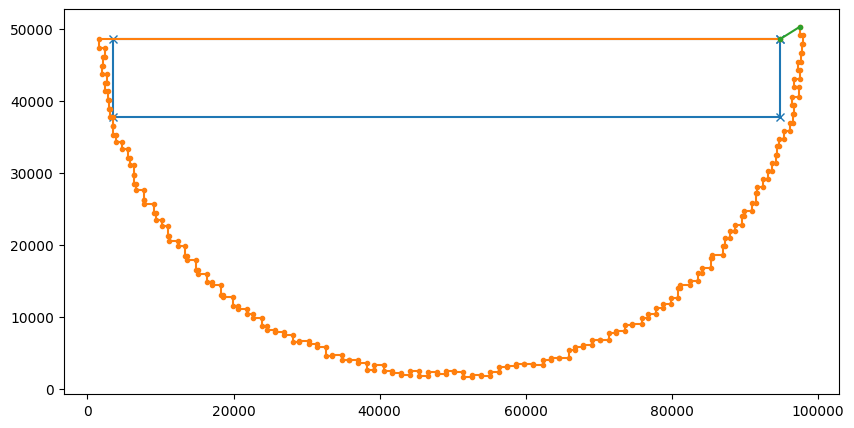

In [46]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_coordinates, y_coordinates, marker = 'x')
plt.plot(tiles_np[:, 0], tiles_np[:, 1], marker = '.')
plt.plot(tiles_np[[0,-1], 0], tiles_np[[0,-1], 1], marker = '.')

plt.show()

In [47]:
filtered_df.loc[0]

tile_1_str                  94822,48525
tile_1                   (94822, 48525)
tile_1_id                           246
tile_2_str                   3522,37713
tile_2                    (3522, 37713)
tile_2_id                           227
area                          987237713
start_tile_inside                 False
tile_inside                        None
edge_inside_rectangle             False
x_inside                           None
y_inside                           None
edge_inside                        None
Name: 0, dtype: object

In [48]:
1154986140 > 987237713

True